In [1]:
# final exam -4 MLPclassfier 

In [5]:
import csv
import numpy as np
from scipy import stats
import math
from numpy.linalg import inv, norm, pinv
import random
from sklearn.neural_network import  MLPClassifier
from sklearn import metrics
import timeit
import matplotlib.pyplot as plt

In [3]:
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\final\\mnist_train.csv", "rb"), delimiter=",")
Tx = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\final\\mnist_test.csv", "rb"), delimiter=",")
print("Size of the training set:-")
print(Tr.shape)
print("Size of the Testing set:-")
print(Tx.shape)
print("Size of the Testing Labes:-")

##########################################################
# divide the Training sets to seperate the labels and the images 
Trl=Tr[:,0]                 # Training labels 
Trd=Tr[:,1:]                # Training data 
Tr0 = []
Tr0l=[]
Txl=Tx[:,0]                 # Testing labels 
Txd=Tx[:,1:]                #testing data


Size of the training set:-
(60000, 785)
Size of the Testing set:-
(10000, 785)
Size of the Testing Labes:-


In [22]:
#  Frist  ran the code a few times to check how it performs generally 

stime = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes=(50,),max_iter = 100,solver = "sgd")
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
mlp.score(Txd,Txl)

training time:  25.787400072709715  secs


0.89229999999999998

In [12]:
stime = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes=(50,),max_iter = 1000,solver = "sgd")
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
mlp.score(Txd,Txl)

training time:  50.71848669416977  secs


0.89759999999999995

In [18]:
stime = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes=(50,),tol=1e-5,max_iter = 1000,solver = "sgd")

mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
mlp.score(Txd,Txl)

training time:  24.01802543568556  secs


0.71819999999999995

In [19]:
stime = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes=(200,),tol=1e-5,max_iter = 100,solver = "sgd",learning_rate="invscaling")

mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
mlp.score(Txd,Txl)

training time:  240.0116441232658  secs


C:\Users\grbag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.85319999999999996

In [21]:
stime = timeit.default_timer()
mlp = MLPClassifier(hidden_layer_sizes=(200,),tol=1e-5,max_iter = 500,solver = "sgd",learning_rate="invscaling")

mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
mlp.score(Txd,Txl)

training time:  1281.201301368823  secs


C:\Users\grbag\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.84470000000000001

In [ ]:
# ACTIVATION
#  The activation parameter is used for the hidden layer. The activation function 
#  for the hidden layer -> logistic tanh or relu . It is observed that tanh converges quickly with more accuracy than 
# sigmoid and Logistic. Even better is ReLu which is better. So we will use ReLU for future calculations
# 

# SOLVER
# lbfgs requires soring about 20-100 gradient calculations thus more memory 
# For smaller datasets ibfgs converges faster and better.
# Thus in a random case lbfgs is the best choice if memory is not an issue.
# The default solver adam works pretty well on large datasets, Hence we chosee adam over ibfgs

# ALPHA
# a smaller value of alpha gives more accuracy, slected value of alpha = 1e-5





In [32]:
stime = timeit.default_timer()
alp=1e-5
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,)
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))

###
stime = timeit.default_timer()
alp=1e-4
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,)
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))
stime = timeit.default_timer()
alp=1e-2
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,)
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))

training time:  34.133927516726544  secs
0.9538
training time:  52.89283506650827  secs
0.9512
training time:  45.101063599089684  secs
0.949


In [38]:
# ALPHA
# a smaller value of alpha gives more accuracy, slected value of alpha = 1e-5

#LEARNING RATE INIT - 
# Initallearning rate which controls the step size of the weights . A tradoff bewteen training time and step size is taken for better results 

#SHUFFLE
# as the name suggests it shuffles the samples after each iteration and the default condtion is true no leave it default

# epsilon 
# : float, optional, default 1e-8
# Value for numerical stability in adam. Only used when solver=’adam’

stime = timeit.default_timer()
alp=1e-5
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=1e-08)
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))
      
stime = timeit.default_timer()
alp=1e-5
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=1e-05)
mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))

training time:  35.26740262565727  secs
0.9546
training time:  32.57042698762234  secs
0.951


In [40]:
#  AFter Running the above cell twice, it is obvered that epsilon= 1e-05 works better decreasing the runntime slightly.

stime = timeit.default_timer()
alp=1e-5
epi = 1e-5
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=100 ,tol=1e-4)

mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))

stime = timeit.default_timer()
alp=1e-5
epi = 1e-5
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=100, tol=1e-3)

mlp.fit(Trd,Trl)
Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))
# MAX_ITER
# it defines the maximum iteration untill covergence and isdetermined by tol. although the default is 200 it gave  96 % accuracy with 100 
# With tolarence as high as 1e-3 the training time reduces drasftically by 9 secs  with decrease of 1 % of accuracy
# So it run time is long, we can reduce the torlerance




training time:  35.86286895653757  secs
0.9561
training time:  26.16365208395291  secs
0.9509


In [44]:
# SO the best parameters selected are
stime = timeit.default_timer()
alp=1e-5
epi = 1e-8
t1=1e-4
itermax= 200
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=itermax, tol=t1)
mlp.fit(Trd,Trl)

Trtime = timeit.default_timer() - stime 
print("training time: ",Trtime," secs")
print(mlp.score(Txd,Txl))
predtr  = mlp.predict(Trd)
predtx  = mlp.predict(Txd)
TrAcc  =   100*metrics.accuracy_score(predtr,Trl)
TxAcc  =   100*metrics.accuracy_score(predtx,Txl)
print('The training accuracy =',TrAcc)
print('The Testing accuracy = ',TxAcc)

#  with 50 hidden layers and the above parameters the testing accuracy is 95% which can be increase with the increase of the laye

training time:  30.171625815382868  secs
0.9542
The training accuracy = 97.8083333333
The Testing accuracy =  95.42


training time:  30.862756471666216  secs for  (50,) hidden layers
The training accuracy = 97.85 for  (50,) hidden layers
The Testing accuracy =  95.49 for  (50,) hidden layers
training time:  35.22333782450005  secs for  (70,) hidden layers
The training accuracy = 97.905 for  (70,) hidden layers
The Testing accuracy =  95.58 for  (70,) hidden layers
training time:  35.39780538143532  secs for  (80,) hidden layers
The training accuracy = 98.435 for  (80,) hidden layers
The Testing accuracy =  95.91 for  (80,) hidden layers
training time:  37.505445290211355  secs for  (100,) hidden layers
The training accuracy = 98.2166666667 for  (100,) hidden layers
The Testing accuracy =  95.87 for  (100,) hidden layers
training time:  38.55875148143241  secs for  (150,) hidden layers
The training accuracy = 98.3366666667 for  (150,) hidden layers
The Testing accuracy =  95.93 for  (150,) hidden layers
training time:  67.29419906013209  secs for  (200,) hidden layers
The training accuracy = 98.555 fo

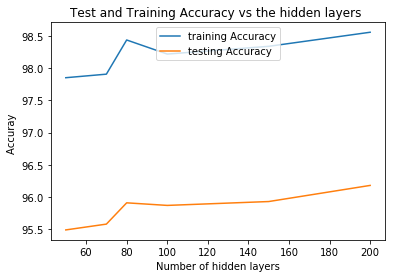

In [48]:
# 4b) accuracy vs the number of nodes in the hidden layers 
Hlayers = [50,70,80,100,150,200]
alp=1e-5
epi = 1e-8
t1=1e-4
itermax= 200
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=itermax, tol=t1)
mlp.fit(Trd,Trl)

TrAccmat=[]
TxAccmat=[]
for hl in zip(Hlayers): 
    stime = timeit.default_timer()
    mlp = MLPClassifier(hidden_layer_sizes=(hl),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=itermax, tol=t1)
    mlp.fit(Trd,Trl)
    Trtime = timeit.default_timer() - stime  
    print("training time: ",Trtime," secs",'for ',hl,'hidden layers' )
#     print(mlp.score(Txd,Txl))
    predtr  = mlp.predict(Trd)
    predtx  = mlp.predict(Txd)
    TrAcc  =   100*metrics.accuracy_score(predtr,Trl)
    TxAcc  =   100*metrics.accuracy_score(predtx,Txl)
    TrAccmat.extend([TrAcc])
    TxAccmat.extend([TxAcc])
    print('The training accuracy =',TrAcc,'for ',hl,'hidden layers')
    print('The Testing accuracy = ',TxAcc,'for ',hl,'hidden layers')
    
    
plt.plot(Hlayers, TrAccmat, label='training Accuracy')
plt.plot(Hlayers, TxAccmat, label='testing Accuracy ')
plt.ylabel('Accuray ')
plt.xlabel('Number of hidden layers')
plt.legend(loc='upper center')
plt.title('Test and Training Accuracy vs the hidden layers ')

plt.show()    

training time:  46.25612910300697  secs for  (50,) hidden layers
The training accuracy = 98.7616666667 for  (50,) hidden layers
The Testing accuracy =  95.97 for  (50,) hidden layers
training time:  33.357187765454  secs for  (70,) hidden layers
The training accuracy = 98.8283333333 for  (70,) hidden layers
The Testing accuracy =  96.39 for  (70,) hidden layers
training time:  44.84065795537754  secs for  (80,) hidden layers
The training accuracy = 99.1 for  (80,) hidden layers
The Testing accuracy =  96.41 for  (80,) hidden layers
training time:  47.8069012111373  secs for  (100,) hidden layers
The training accuracy = 98.94 for  (100,) hidden layers
The Testing accuracy =  96.6 for  (100,) hidden layers
training time:  96.3844852688926  secs for  (150,) hidden layers
The training accuracy = 98.8716666667 for  (150,) hidden layers
The Testing accuracy =  96.75 for  (150,) hidden layers
training time:  52.990519535516796  secs for  (200,) hidden layers
The training accuracy = 98.72 for 

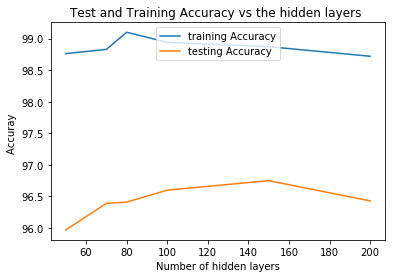

In [56]:
# 4b) accuracy vs the number of nodes in the 3 hidden layers 
Hlayers = [50,70,80,100,150,200]
alp=1e-5
epi = 1e-8
t1=1e-4
itermax= 200
mlp = MLPClassifier(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=itermax, tol=t1)
mlp.fit(Trd,Trl)

TrAccmat=[]
TxAccmat=[]
for hl in zip(Hlayers): 
    hl2=hl[0]+20
    hl3=hl[0]+30
    stime = timeit.default_timer()
    mlp = MLPClassifier(hidden_layer_sizes=(hl[0],hl2,hl3),activation='relu',solver='adam',alpha=alp,epsilon=epi,max_iter=itermax, tol=t1)
    mlp.fit(Trd,Trl)
    Trtime = timeit.default_timer() - stime  
    print("training time: ",Trtime," secs",'for ',hl,'hidden layers' )
#     print(mlp.score(Txd,Txl))
    predtr  = mlp.predict(Trd)
    predtx  = mlp.predict(Txd)
    TrAcc  =   100*metrics.accuracy_score(predtr,Trl)
    TxAcc  =   100*metrics.accuracy_score(predtx,Txl)
    TrAccmat.extend([TrAcc])
    TxAccmat.extend([TxAcc])
    print('The training accuracy =',TrAcc,'for ',hl,'hidden layers')
    print('The Testing accuracy = ',TxAcc,'for ',hl,'hidden layers')
    
    
plt.plot(Hlayers, TrAccmat, label='training Accuracy')
plt.plot(Hlayers, TxAccmat, label='testing Accuracy ')
plt.ylabel('Accuray ')
plt.xlabel('Number of hidden layers')
plt.legend(loc='upper center')
plt.title('Test and Training Accuracy vs the hidden layers ')

plt.show() 

In [ ]:
# 3 c)
# MLP classifier is better than svc rbf which took 94 secs for an accuracy of 96
# mlp is very fast as compared to the SVC 
# THE accuracy of the naive bayes is comparable mlp with testing accuracy almost 96 
# KNN is the slowest compared to all, it is hard to implement on the big data set. 
# Logistic Regression is the easiest to implement but has low accuracy and more training time 

